# Introduction to Python
# Class 3: Data manipulation

## Objectives

In the last class, 
we learned to import and inspect spreadsheet data into Python,
and then explored ways to extract particular columns/rows/slices.
That means we're ready to dive deeper into additional data manipulation activities provided by `pandas`.

By the end of this lesson, you should be able to:
- subset data by idenitfying rows that meet particular conditions
- grouping data to summarize by category
- visualize data with `matplotlib`
- accommodate missing data

## Getting set up

Create a new Python notebook called `class3` in your project directory.

We'll first load our library for this lesson:

In [1]:
# load pandas library
import pandas as pd

Then we can import and inspect our data:

In [2]:
# import data
clinical_df = pd.read_csv("data/clinical.csv") 
clinical_df.head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
2,C34.3,stage ib,28171.0,dead,8070/3,2304.0,live,C34.3,-28171.0,C34.3,2099.0,1.643836,NaN,female,1927.0,white,not hispanic or latino,NaN,TCGA-18-3408,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
4,C34.3,stage iib,29827.0,dead,8070/3,146.0,live,C34.3,-29827.0,C34.3,NaN,NaN,NaN,male,1923.0,not reported,not reported,2004.0,TCGA-18-3410,LUSC


## Conditional subsetting

Now that we're set up with data and tools,
we're going to explore conditional subsetting.
This means extracting particular rows based on a criteria.

For example, 
we may want to find all data from patients born in 1930.
We may be tempted to try something like `clinical_df.year_of_birth == 1930`,
but the output we get isn't quite what we wanted: the results are logical data (true/false).

> We used double equal signs (`==`) to indicate mathematical equivalency,
and to differentiate from variable assignment and specifying parameters for arguments
(like in the last lesson with `sep=` for loading data).

However, we can combine this information with what we know about data subsetting:

In [3]:
# conditionally subset all patients born in 1930
clinical_df[clinical_df.year_of_birth == 1930].head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
26,C34.3,stage ib,24253.0,alive,8070/3,NaN,live,C34.3,-24253.0,C34.3,3724.0,5.479452,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-21-1080,LUSC
51,C34.1,stage iiia,26937.0,dead,8070/3,1057.0,live,C34.1,-26937.0,C34.1,1057.0,3.287671,NaN,female,1930.0,white,not reported,2005.0,TCGA-22-4601,LUSC
52,C34.1,stage iia,26952.0,dead,8070/3,399.0,live,C34.1,-26952.0,C34.1,NaN,2.739726,NaN,male,1930.0,white,not reported,2004.0,TCGA-22-4604,LUSC
57,C34.3,stage ib,27749.0,alive,8070/3,NaN,live,C34.3,-27749.0,C34.3,1845.0,2.739726,NaN,male,1930.0,white,not reported,NaN,TCGA-22-5471,LUSC


We can invert the select (e.g., identify all patients *not* born in 1930)
using `!=`:

In [4]:
# conditionally subset all patients NOT born in 1930
clinical_df[clinical_df.year_of_birth != 1930].head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
2,C34.3,stage ib,28171.0,dead,8070/3,2304.0,live,C34.3,-28171.0,C34.3,2099.0,1.643836,NaN,female,1927.0,white,not hispanic or latino,NaN,TCGA-18-3408,LUSC
4,C34.3,stage iib,29827.0,dead,8070/3,146.0,live,C34.3,-29827.0,C34.3,NaN,NaN,NaN,male,1923.0,not reported,not reported,2004.0,TCGA-18-3410,LUSC
5,C34.1,stage iiia,23370.0,alive,8070/3,NaN,live,C34.1,-23370.0,C34.1,3576.0,2.739726,NaN,female,1942.0,not reported,not reported,NaN,TCGA-18-3411,LUSC


We can combine multiple criteria into the same filter:

In [5]:
# extract all patients born between 1930 and 1940
clinical_df[(clinical_df.year_of_birth >= 1930) & (clinical_df.year_of_birth <= 1940)].head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
7,C34.3,stage iv,26938.0,dead,8070/3,716.0,live,C34.3,-26938.0,C34.3,NaN,1.369863,NaN,male,1932.0,asian,not hispanic or latino,2006.0,TCGA-18-3414,LUSC
11,C34.3,stage iib,26813.0,alive,8070/3,NaN,live,C34.3,-26813.0,C34.3,2811.0,2.739726,NaN,male,1934.0,not reported,not reported,NaN,TCGA-18-3419,LUSC


In the example above, the ampersand (`&`) represents *AND*, 
meaning any value must meet *both* conditions.
We can include a vertical pipe (`|`), representing *OR*,
meaning a value must meet *at least one* condition.

In [6]:
# extract all data for cases born in 1930 or 1931
clinical_df[(clinical_df.year_of_birth == 1930) | (clinical_df.year_of_birth == 1931)].head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
26,C34.3,stage ib,24253.0,alive,8070/3,NaN,live,C34.3,-24253.0,C34.3,3724.0,5.479452,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-21-1080,LUSC
51,C34.1,stage iiia,26937.0,dead,8070/3,1057.0,live,C34.1,-26937.0,C34.1,1057.0,3.287671,NaN,female,1930.0,white,not reported,2005.0,TCGA-22-4601,LUSC
52,C34.1,stage iia,26952.0,dead,8070/3,399.0,live,C34.1,-26952.0,C34.1,NaN,2.739726,NaN,male,1930.0,white,not reported,2004.0,TCGA-22-4604,LUSC


> #### Challenge-conditionals
Print to the screen all data from `clinical_df` for patients with stage ia tumors (column `tumor_stage`) who live more than 365 days (`days_to_death`).

## Grouping data

Another useful feature of `pandas` is the ability to group data by categories,
so you can then summarize other quantitative variables in the dataset.

First, we can explore what categories exist for our `race` column:

In [7]:
# identify unique elements in a column
pd.unique(clinical_df["race"])

array(['white', 'asian', 'not reported', 'black or african american', nan,
       'american indian or alaska native',
       'native hawaiian or other pacific islander'], dtype=object)

Remember that the code above is synonymous to `pd.unique(clinical_df.race)`, 
which uses a different syntax to access the column.

Now that we know the categories in `race`,
we may be interested in summarizing quantitative variables based on these categories.
We can assign our grouped data to a new variable:

In [8]:
# group data by race 
grouped_data = clinical_df.groupby("race")

`grouped_data` represents the same data, but with the data oriented according to categories
(though it isn't interpretable by humans, so it's not useful to print it to the screen).

> In the command above,
we can't specify race using `.` because of the syntax required by `groupby`.

We can then calculate summary statistics for our grouped data:

In [9]:
# summary stats for all columns by race
grouped_data.describe()

age_at_diagnosis                \
                                                     count          mean   
race                                                                       
american indian or alaska native                      15.0  18653.400000   
asian                                                299.0  21743.906355   
black or african american                            575.0  21970.570435   
native hawaiian or other pacific islander             12.0  19740.000000   
not reported                                        1082.0  23870.847505   
white                                               4735.0  22062.366631   

                                                                           \
                                                   std      min       25%   
race                                                                        
american indian or alaska native           4803.399954   7855.0  16817.50   
asian                                      4925.857739   6572.0  18681.50   
black or african american                  5037.715451   6377.0  18577.50   
native hawaiian or other pacific islander  3433.788181  14225.0  17718.00   
not reported                               4128.186661   5303.0  21427.25   
white                                      5223.048363   3982.0  18771.00   

                                                                       \
                                               50%       75%      max   
race                                                                    
american indian or alaska native           19423.0  21279.00  28472.0   
asian                                      21428.0  25789.00  32872.0   
black or african american                  22372.0  25804.00  32872.0   
native hawaiian or other pacific islander  20124.0  21709.75  24981.0   
not reported                               24134.5  26453.75  32872.0   
white                                      22642.0  25929.00  32872.0   

                                          days_to_death              ...  \
                                                  count        mean  ...   
race                                                                 ...   
american indian or alaska native                    3.0  277.333333  ...   
asian                                              67.0  514.880597  ...   
black or african american                         179.0  893.726257  ...   
native hawaiian or other pacific islander           4.0  753.000000  ...   
not reported                                      204.0  715.009804  ...   
white                                            1730.0  911.302312  ...   

                                          year_of_birth         year_of_death  \
                                                    75%     max         count   
race                                                                            
american indian or alaska native                 1965.0  1977.0           3.0   
asian                                            1961.0  1991.0          27.0   
black or african american                        1959.0  1991.0         131.0   
native hawaiian or other pacific islander        1960.0  1969.0           3.0   
not reported                                     1951.0  1988.0         147.0   
white                                            1957.0  1993.0        1255.0   

                                                                          \
                                                  mean       std     min   
race                                                                       
american indian or alaska native           2006.000000  7.937254  1997.0   
asian                                      2006.703704  3.244105  1999.0   
black or african american                  2006.809160  4.665940  1992.0   
native hawaiian or other pacific islander  2006.000000  3.464102  2002.0   
not reported                               2006.115646  4.

This output only summarizes quantitative variables 
(the names listed in the first line of the output, e.g., `age_at_diagnosis`).
The subtitles in the output (e.g., `count`, `mean`, etc)
represent the summary statistics for each variable, 
grouped by race (in the row labels).

Only a subset of the output is included above;
the ellipsis (`...`) in the middle of the dataset indicate it's been truncated.
You can extract only the data for a single column:

In [10]:
# summary stats for race for only one column (days_to_death)
grouped_data.days_to_death.describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
american indian or alaska native,3.0,277.333333,153.968612,100.0,227.5,355.0,366.0,377.0
asian,67.0,514.880597,469.331682,3.0,196.0,385.0,709.5,2532.0
black or african american,179.0,893.726257,1032.724507,5.0,244.0,532.0,1114.0,6456.0
native hawaiian or other pacific islander,4.0,753.000000,491.974254,262.0,502.0,661.0,912.0,1428.0
not reported,204.0,715.009804,778.817671,0.0,180.0,456.5,945.0,3838.0
white,1730.0,911.302312,1095.713823,2.0,291.0,541.0,1066.5,10870.0


In addition to these basic summary statistics for quantitative variables,
we can also assess how missing data affects the data available for each category.
We obtain this information by counting the nuber of data points for each category from our grouped data:

In [11]:
# show the number of patients for each race available for each columns 
grouped_data.count()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,ethnicity,year_of_death,bcr_patient_barcode,disease
race,,,,,,,,,,,,,,,,,,,
american indian or alaska native,15,15,15,15,15,3,15,15,15,15,12,2,0,15,15,15,3,15,15
asian,316,316,299,316,316,67,316,316,299,316,296,27,6,316,315,316,27,316,316
black or african american,581,581,575,581,581,179,581,581,575,581,474,72,24,581,579,581,131,581,581
native hawaiian or other pacific islander,12,12,12,12,12,4,12,12,12,12,9,1,0,12,12,12,3,12,12
not reported,1116,1116,1082,1116,1116,204,1116,1116,1082,1116,976,226,138,1116,1011,1116,147,1116,1116
white,4753,4753,4735,4753,4753,1730,4753,4753,4735,4753,3947,843,280,4753,4730,4753,1255,4753,4753


From the output above,
we can also extract the data for only one column.
This lets us know how many cases for each race category are in our dataset:

In [12]:
# counts for only race
grouped_data.race.count()

race
american indian or alaska native               15
asian                                         316
black or african american                     581
native hawaiian or other pacific islander      12
not reported                                 1116
white                                        4753
Name: race, dtype: int64

It's useful to compare the output from a different column, 
which allows us to understand how missing data affects our ability to
perform statistics tests:

In [13]:
# count the number of each race for which days to death data is available
grouped_data.days_to_death.count()

race
american indian or alaska native                3
asian                                          67
black or african american                     179
native hawaiian or other pacific islander       4
not reported                                  204
white                                        1730
Name: days_to_death, dtype: int64

In this case, we see that missing data for days to death drops the number of patients in each race category by a substantial amount.

Moreover, we can extract a single race category from the output above:

In [14]:
# only display one race (asian), from days_to_death grouped by race
grouped_data.days_to_death.count().asian

67

This is an example of how you can use various pieces of Python syntax
to ask increasingly specific questions of the data.

It's useful to remember that the command above is synonymous with:

In [15]:
# another way: only display one race (asian), from days_to_death grouped by race
clinical_df.groupby("race")["days_to_death"].count()["asian"]

67

This command differs from the previous example because 
it begins by grouping the original data object (`clinical_df`),
and applies alternative syntax for identifying columns.

> Parentheses vs square brackets: You may be wondering at this point when to use parentheses (`()`) and when to use square brackets (`[]`).
Parentheses are used to encase options associated with a function.
For example, `groupby` above is followed by parentheses,
because `"race"` is being used as an option for the method.
`count` is followed by empty parentheses, because it's a function,
but there are no arguments.
On the other hand, square brackets are associated with accessing (subsetting or extracting) parts of a larger data object;
they are not explicitly part of a function.

Once you've identified the specific reformatting of data that you need,
you may want to assign the output to a new object:

In [16]:
# save output to object for later use
race_counts = grouped_data.days_to_death.count()
print(race_counts)

race
american indian or alaska native                3
asian                                          67
black or african american                     179
native hawaiian or other pacific islander       4
not reported                                  204
white                                        1730
Name: days_to_death, dtype: int64


> #### Challenge-combine
Write code that will display the number of patients in this dataset who are listed as alive.
> 
> (Hint: you should first group by `vital_status`, 
then extract only the `vital_status` results,
then tally the number in each category, 
and finally extract only the answer for living patients)

## Visualizing data with pandas

The object we assigned at the end of the last section has data grouped by race
and assessed for the days to death column. 
We can use these data to visualize the counts.

First, we'll execute a line of code that may be necessary for some notebooks to visualize plots:

In [17]:
# allow figures appear inline for notebooks
%matplotlib inline

The code above may not make a difference for your specific notebook installation
(some new versions of notebooks are smarter than others!).
If you end up in an environment where your plots fail to show and that code doesn't work,
you can can also try running `plt.show()` after executing code for a plot.

Our entire next class is dedicated to plotting with the package `plotnine`.
In this lesson,
we'll do a quick introduction to plotting with `matplotlib`.
This collection of functions is commonly used for plotting in Python, 
and is useful for taking a quick look at common types of plots since it's 
integrated with `pandas.`

We'll use the object we created at the end of the last section to demonstrate a bar plot:

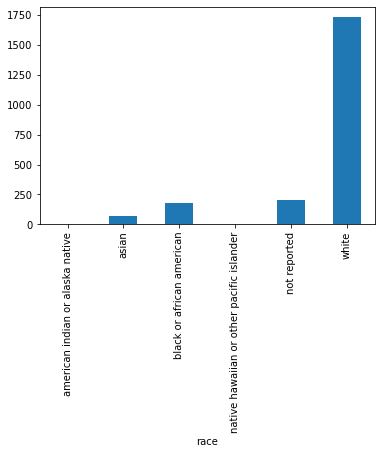

In [18]:
# bar chart of number of patients of each race
race_counts.plot(kind="bar");

The semicolon at the end of the command suppresses text output at the top of the plot.

You can see the other types of plots available by looking at the help documentation for `.plot()`.
A few more examples of this type of plotting approach is available [here](https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4).

> #### Challenge-total-count 
Create a new object called `total_count` that counts the number of samples for each cancer type (disease)

## Missing data

The final section in this lesson will help you compare a few ways to handle missing data across a data frame.

We can use `isnull` to show us where missing data are found in the dataset:

In [19]:
pd.isnull(clinical_df).head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False


Any field showing `True` represents a cell with missing data
(missing data in the original data frame are shown as `NaN`).

The effects of these missing data include multiple complications later in analysis,
including code errors and misinterpreting statistical output.
One basic example of this occurs from attempting to change the data type in year of birth 
(from float to integer

`clinical_df.year_of_birth = clinical_df.year_of_birth.astype("int64"))`

That code would result in a `ValueError`:
    
`ValueError: Cannot convert non-finite values (NA or inf) to integer`

This means `NA` values are prohibiting data conversion for this column.

If we used `dropna` to remove all rows with missing data,
and then use `len` to assess how many rows are remaining:

In [20]:
# extract all rows WITHOUT missing data
len(clinical_df.dropna())

50

This leaves us with only 50 of our original 6832 cases!
This is because most of our cases have missing data in one or more field.

We'll explore two methods for handling missing data that allow us to retain the specific data we need.

### Replacing data in copied data frame

The first approach to handling missing data is to copy the existing data frame and then replacing missing data.

As we discussed in the last lesson,
you need to apply the `copy()` method to create another data frame 
(rather than referencing the prior object):

In [21]:
# create new copy of data frame
clinical_copy = clinical_df.copy()

Then we can use `pandas` functions to replace `NaN` with a different value:

In [22]:
# replace missing values with 0
clinical_copy.year_of_birth = clinical_copy.year_of_birth.fillna(0)

This approach allows us to retain all observations in the original data frame,
and is one method sometimes used (for example, in machine learning)
to retain as much data as possible.

However, this approach does alter the statistical properties of the remaining data.
If we compare the average year of birth for our original data frame and the copied frame with missing data replaced by 0:

In [23]:
print("original =", clinical_df.year_of_birth.mean())
print("copied =", clinical_copy.year_of_birth.mean())

original = 1947.560942659862
copied = 1899.0999707259953


We find the average is vastly different.
Therefore, this approach isn't good for projects that rely on summary statistics.

A slight modification would be to replace all missing values with the mean year of birth instead (`clinical_copy.year_of_birth.fillna(clinical_copy.year_of_birth.mean())`).
We won't try to do this here (since we've already replaced those missing data!),
but can provide another option depending on your need.

### Masking missing data

The second approach to handling missing data is masking,
which excludes particular subsets of data that contain missing values.
We'll explore a few approaches to masking
while constructing the two data frames we'll be using next class for data visualization.

The first dataset we'll create has missing data removed for cigarettes per day 
and age at diagnosis.

> Because masking doesn't involve modifying the original data,
only filtering out whole rows and columns,
we don't need to copy a new object.

We can use `dropna` with the `subset` argument to exclude 
missing values for only one column:

In [24]:
# exclude missing data in only cigarettes per day
smoke_complete = clinical_df.dropna(subset = ["cigarettes_per_day"])

We assigned this to (referenced) a new object so we can continue with our filters.

It's also possible to use `isnull` to subset data,
though we don't do so here:

`clinical_df[-pd.isnull(clinical_df.cigarettes_per_day)]`

Next, we can apply a filter that will remove missing data for age at diagnosis:

In [25]:
# apply additional filter for age at diagnosis
smoke_complete = smoke_complete[smoke_complete.age_at_diagnosis > 0]

While we could've used `dropna`,
it's useful to know you can apply additional filters depending on the specific data involved.
Here, missing data do not pass the filter of being greater than 0,
and there are no cases in the dataset with an age at diagnosis that is less than 0,
so this effectively removes only missing values.

Once we are satisfied with our filtering,
we may want to retain our data for later.
This could be so we can load it into another program,
or share with another collaborator,
both of which require us to access the data outside our notebook.

We can save our filtered data frame as spreadsheet-style data to a csv file:

In [26]:
# save filtered data to file
smoke_complete.to_csv("data/smoke_complete.csv", index=False)

The `index=False` argument prevents the row's index values from being printed before the first column.

You can see the new file in your project directory (in the data subfolder).
This is the first of two datasets we'll use in the next class on data visualization.

Now, we'll move on and use our masking skills to create the second dataframe we'll use in the next lesson.

First, we can reference the original data:

In [27]:
# reference original data
birth_reduced = clinical_df

> #### Challenge-filter
Mask (filter out) missing data from `birth_reduced` for `year_of_birth` and `vital_status`. (Hint: check to see what categories exist for the latter column).

There are several ways to approach the challenge above.
First, you might try to use `dropna` to remove multiple columns:

In [28]:
birth_reduced = birth_reduced.dropna(subset = ["year_of_birth", "vital_status"])

While this executes without a problem, 
you can check to see what categories are present in `vital_status`:

In [29]:
# show categories
pd.unique(birth_reduced.vital_status)

array(['dead', 'alive', 'not reported'], dtype=object)

This reveals there are some missing data encoded in a category called `not_reported`.
This means we need to add an additional filter to remove that category:

In [30]:
birth_reduced = birth_reduced[birth_reduced.vital_status != "not reported"]

We can check to see that it worked:

In [31]:
pd.unique(birth_reduced.vital_status)

array(['dead', 'alive'], dtype=object)

There is one remaining manipulation we'll cover with our `birth_reduced` dataset.

We have many different cancer types in this dataset, 
but we would like to retain only those cancers with a large number of cases represented.
We can apply a filter on this criteria,
but will need to start by counting how many cases for each cancer type exist in our dataset:

In [32]:
# count number of samples for each cancer type
dis_counts = birth_reduced.groupby("disease").disease.count()
dis_counts

disease
BLCA     394
BRCA    1094
CESC     305
COAD     459
GBM      594
LGG      515
LUSC     958
MESO      87
PRAD     469
READ     170
SKCM     459
STAD     437
THYM     123
UCEC     539
UCS       57
Name: disease, dtype: int64

The output above doesn't render nicely because we've used `groupby`.
The reason for that is because the grouped output doens't include the row labels of index values. 
we'll need to reset the index values so our `dis_counts` object is properly formatted:

In [33]:
# reset index to default
dis_counts = dis_counts.reset_index(name="counts")
dis_counts

,disease,counts
0,BLCA,394
1,BRCA,1094
2,CESC,305
3,COAD,459
4,GBM,594
5,LGG,515
6,LUSC,958
7,MESO,87
8,PRAD,469
9,READ,170


The index values are now shown in bold to the left of the table.

Next, we can filter the new object so it only includes cancer types with many cases:

In [34]:
# keep only diseases with many observations
dis_counts = dis_counts[dis_counts.counts > 500]
dis_counts

,disease,counts
1,BRCA,1094
4,GBM,594
5,LGG,515
6,LUSC,958
13,UCEC,539


`dis_counts` is a small table listing only the cancer types we'd like to keep in the first column,
with the number of observations for each cancer type in the second column.
We'll now use a special filter, `isin`,
to compare each item in the `disease` column in `birth_reduced` to the `disease` column in `dis_counts`,
keeping only the observations for cancer types that match.

In [35]:
# extract values for frequently occurring cancers
birth_reduced = birth_reduced[birth_reduced["disease"].isin(dis_counts.disease)]
birth_reduced.head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
2,C34.3,stage ib,28171.0,dead,8070/3,2304.0,live,C34.3,-28171.0,C34.3,2099.0,1.643836,NaN,female,1927.0,white,not hispanic or latino,NaN,TCGA-18-3408,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
4,C34.3,stage iib,29827.0,dead,8070/3,146.0,live,C34.3,-29827.0,C34.3,NaN,NaN,NaN,male,1923.0,not reported,not reported,2004.0,TCGA-18-3410,LUSC


Our resulting data table includes all observations from `birth_reduced` with cancer types that match those specified in `dis_counts`.

Finally, we can also write these data to a file:

In [36]:
# write data to csv
birth_reduced.to_csv("data/birth_reduced.csv", index=False)

## Wrapping up

Today, learned some additional data manipulation tools available in `pandas`,
including grouping data and dealing with missing data.

We'll wrap up this course in our next lesson by learning how to create publication-quality images using the `plotnine` package.
To prepare for next class,
make sure you have `plotnine` installed.
You can check by loading the package:

`import plotnine`

If you receive an error saying the package is not found,
please see the instructions at the [beginning of Class 4](class4.ipynb) for installing it via your notebook.

## Extra exercises

Answers to all challenge exercises are available [here](https://fredhutchio.github.io/python_intro/solutions/). 

> #### Challenge-subset
Assign a new object called `clinical_subset` containing data from patients who are alive and of Hispanic or Latino ethnicity.
(Hint: use `unique()` to see a list of values in a column.

> #### Challenge-subset2
Use the `clinical_subset` object to create a bar graph showing the number of patients for each category of `primary_diagnosis`.
Label the title and axes appropriately.
(Hint: Look at the Matplotlib documentation for help in labeling)

> #### Challenge-disease-plot
Create a bar graph showing the number of patients for each disease represented in `clinical_df`.

> #### Challenge-alive-yob
Print the number of patients in the dataset listed as alive with a known year of birth.